Inspired from https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf

In [3]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
print("TensorFlow Decision Forests version:", tfdf.__version__)
print("GPU devices:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
TensorFlow Decision Forests version: 1.12.0
GPU devices: []


In [7]:
DATASET_ROOT = '/home/cacc/Repositories/Dataset/house-prices-advanced-regression/'
TRAIN_FILE = 'train.csv'
dataset_df = pd.read_csv(DATASET_ROOT + TRAIN_FILE)
print("Full train dataset shape {}".format(dataset_df.shape))
dataset_df.head()

Full train dataset shape (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Plot price distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

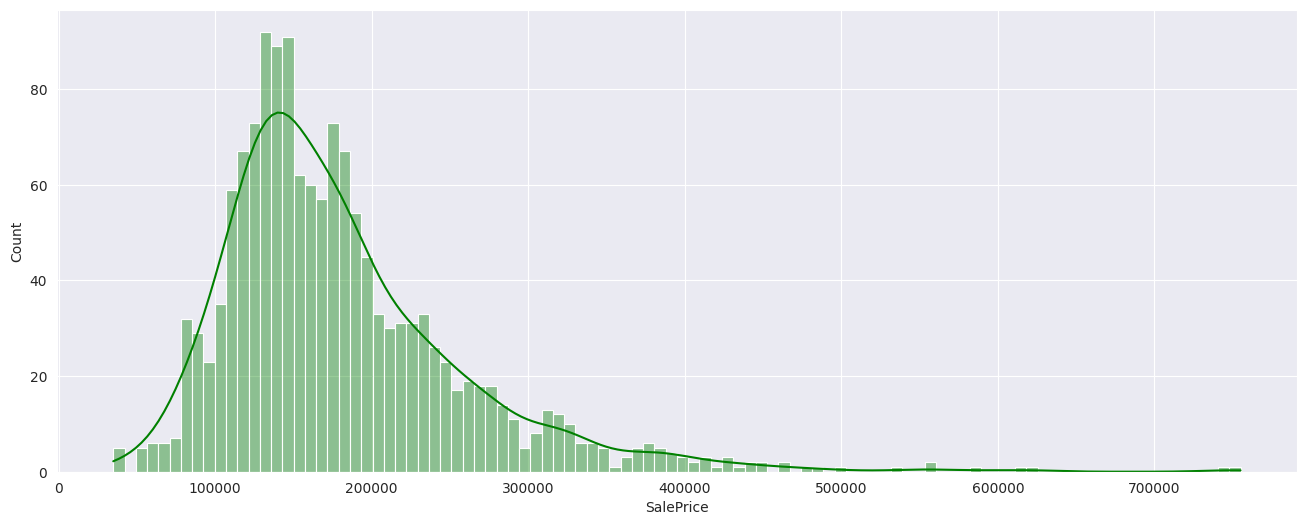

In [21]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(16, 6))
sns.histplot(dataset_df['SalePrice'], kde=True, color='g', bins=100, alpha=0.4)

Get all numeric data and plot

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

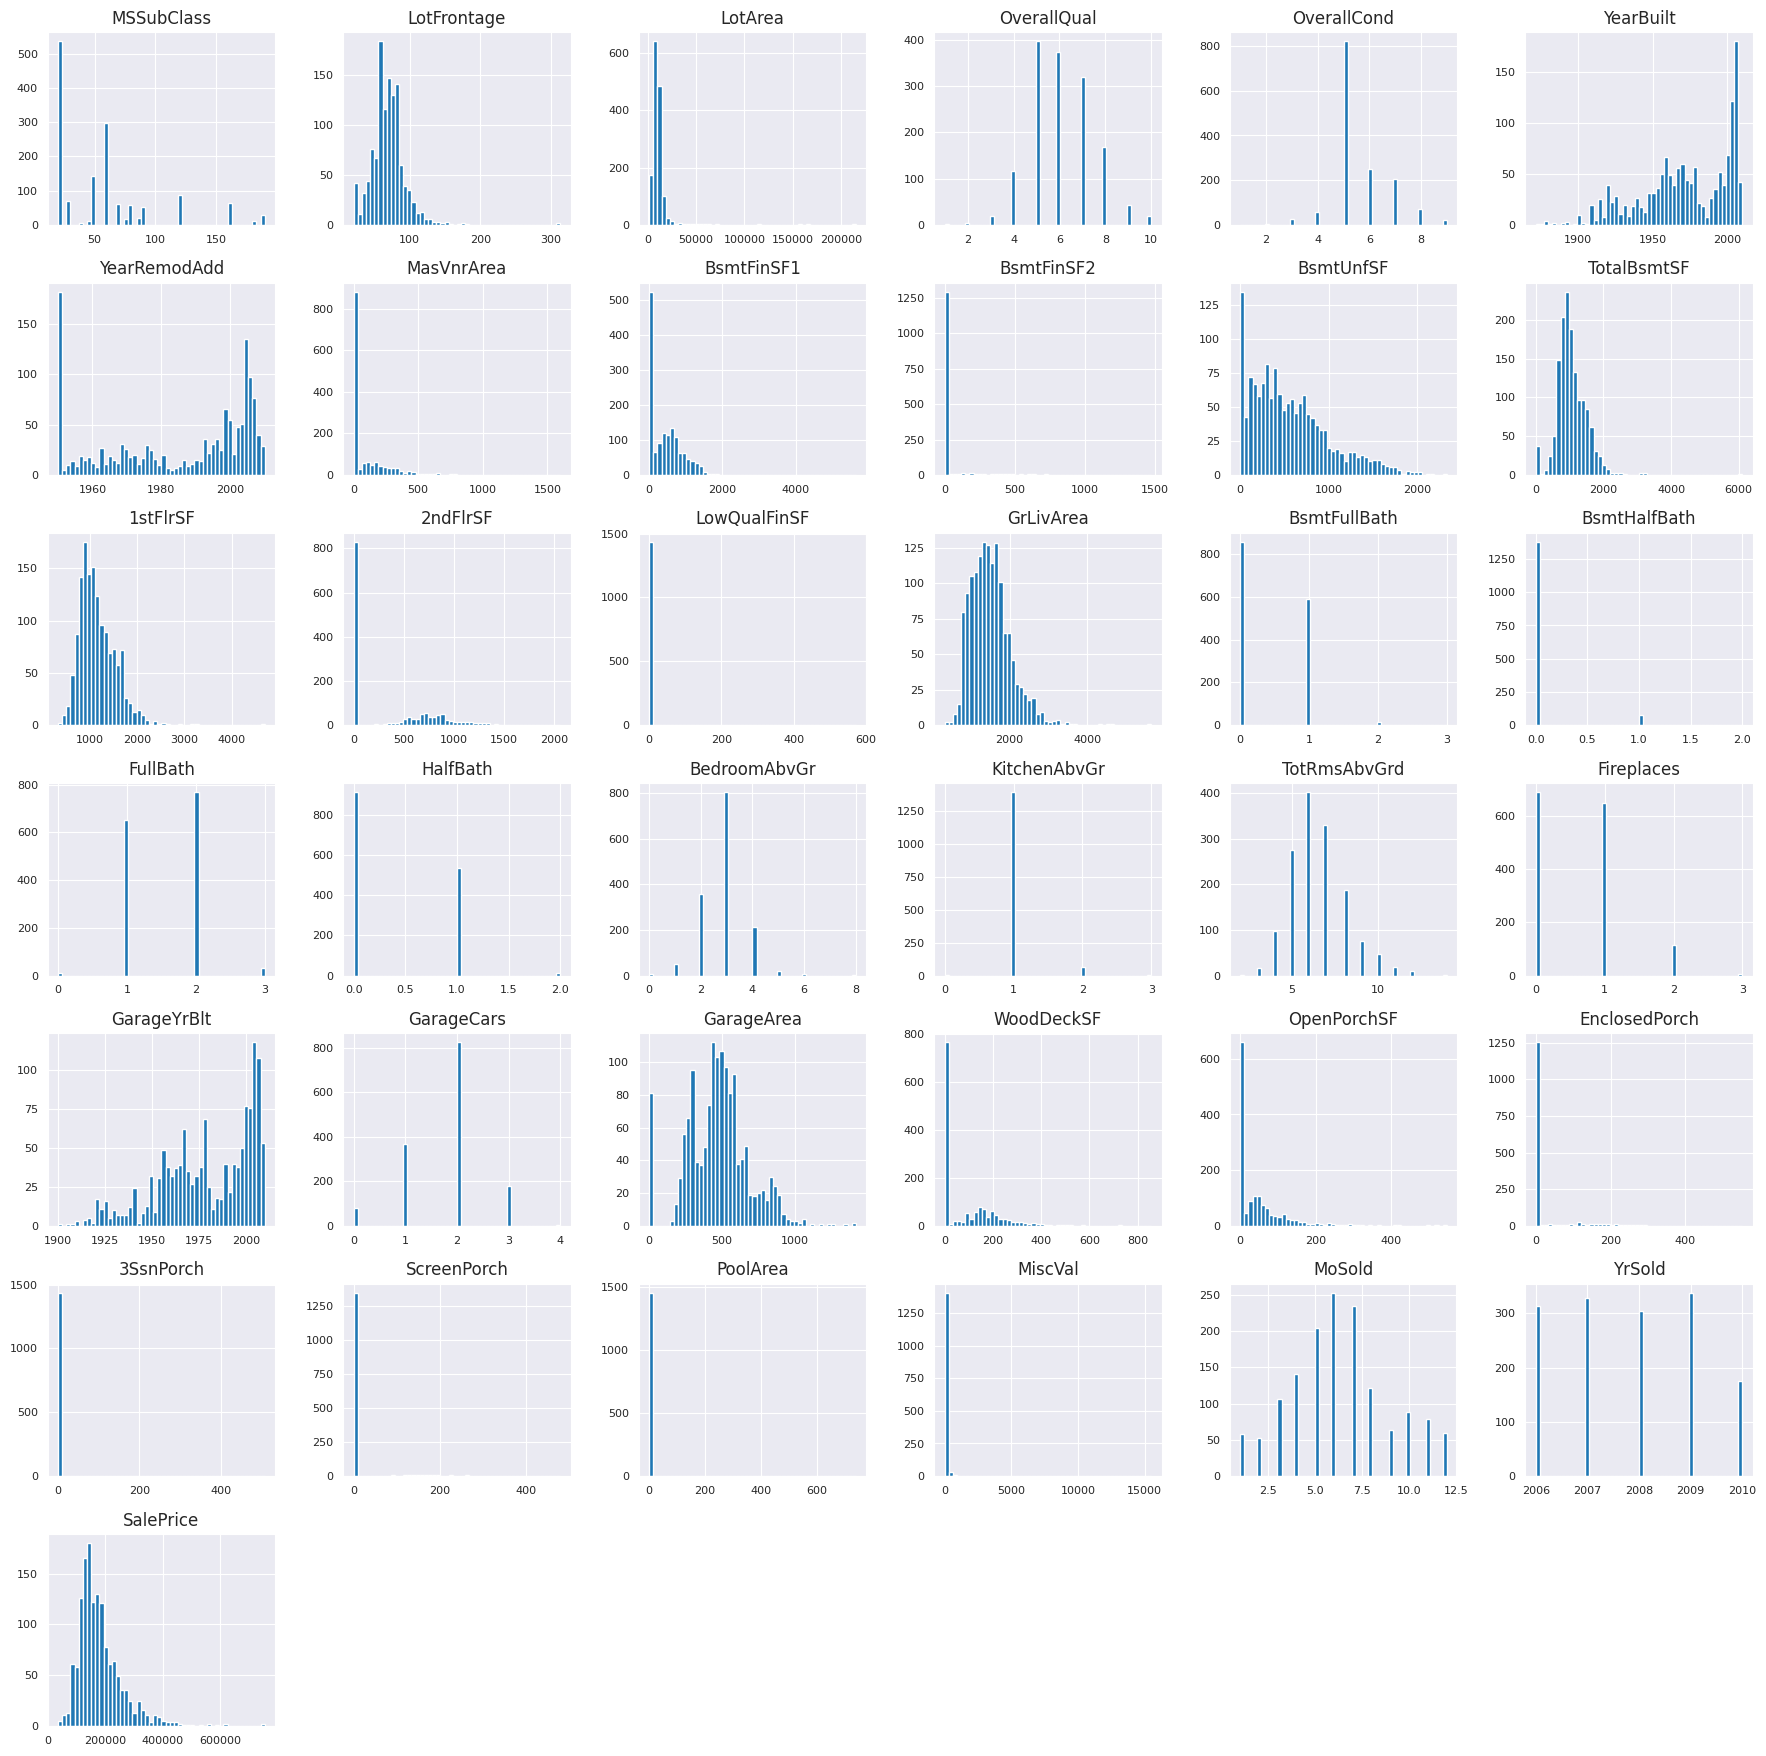

In [19]:
list(set(dataset_df.dtypes.tolist()))
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()
df_num.hist(figsize=(22, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [22]:
import numpy as np

def split_dataset(dataset, test_ratio=0.2):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in validation".format(len(train_ds_pd), len(valid_ds_pd)))


1172 examples in training, 288 examples in validation


Transform pands data frame to tensorflow tensor data

In [23]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [25]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

Create a Random Forest Model for regression by tensorflow decision forest lib

In [26]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmp677ha02v as temporary training directory


In [27]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:02.637357. Found 1172 examples.
Training model...


I0000 00:00:1752843884.857772    4700 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1752843884.857962    4700 kernel.cc:783] Collect training examples
I0000 00:00:1752843884.857968    4700 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1752843884.859714    4700 kernel.cc:401] Number of batches: 2
I0000 00:00:1752843884.859726    4700 kernel.cc:402] Number of examples: 1172
I0000 00:00:1752843884.861225    4700 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1752843884.861239    4700 data_spec_inference.cc:354] 1 item(s) have been prun

Model trained in 0:00:00.543792
Compiling model...


I0000 00:00:1752843885.364019    4700 decision_forest.cc:808] Model loaded with 300 root(s), 111266 node(s), and 73 input feature(s).
I0000 00:00:1752843885.367195    4700 abstract_model.cc:1439] Engine "RandomForestOptPred" built
2025-07-18 21:04:45.367228: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.


In [28]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

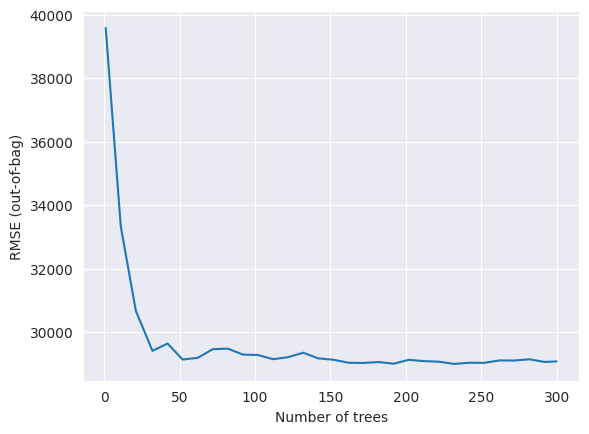

In [29]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [30]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1172, accuracy=None, loss=None, rmse=29075.638918825563, ndcg=None, aucs=None, auuc=None, qini=None)

In [31]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 262ms/step - loss: 0.0000e+00 - mse: 754810880.0000
loss: 0.0000
mse: 754810880.0000


In [32]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


In [33]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 110.0),
 ("ExterQual" (4; #22), 61.0),
 ("GarageCars" (1; #32), 42.0),
 ("Neighborhood" (4; #59), 37.0),
 ("GrLivArea" (1; #38), 13.0),
 ("BsmtQual" (4; #14), 9.0),
 ("KitchenQual" (4; #44), 9.0),
 ("YearBuilt" (1; #76), 9.0),
 ("TotalBsmtSF" (1; #73), 4.0),
 ("1stFlrSF" (1; #0), 2.0),
 ("GarageArea" (1; #31), 2.0),
 ("GarageYrBlt" (1; #37), 2.0)]

['OverallQual', 'ExterQual', 'GarageCars', 'Neighborhood', 'GrLivArea', 'BsmtQual', 'KitchenQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'GarageYrBlt']


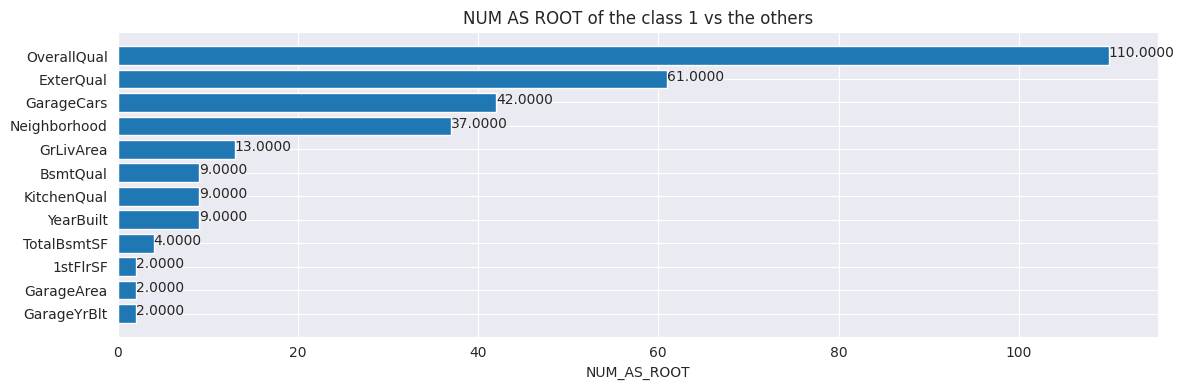

In [36]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
print(feature_names)
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [41]:
TEST_FILE = 'test.csv'
test_data = pd.read_csv(DATASET_ROOT + TEST_FILE)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 0s 11ms/step


,Id,SalePrice
0,1461,128459.343750
1,1462,157088.843750
2,1463,175630.328125
3,1464,182453.515625
4,1465,200814.625000


In [42]:
SAMPLE_SUBMISSION = 'sample_submission.csv'
sample_submission_df = pd.read_csv(DATASET_ROOT + SAMPLE_SUBMISSION)
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('./submission.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 13ms/step


,Id,SalePrice
0,1461,128459.343750
1,1462,157088.843750
2,1463,175630.328125
3,1464,182453.515625
4,1465,200814.625000
